In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from matplotlib.gridspec import GridSpec

# Make the graphs a bit prettier, and bigger
matplotlib.style.use('ggplot')

In [79]:
file = 'mods-10m-conn_count_uid_in.csv'

In [80]:
df = pd.read_csv(file, thousands=',')

In [81]:
df.set_index(df.columns[1], inplace=True)

In [95]:
categories = df[df.columns[0]].unique()

diffs:

 count       67.000000
mean      7584.358209
std      18135.888794
min      -2010.000000
25%        539.000000
50%       1618.000000
75%       2962.000000
max      63166.000000
Name: Sum of conn_count_uid_in, dtype: float64 



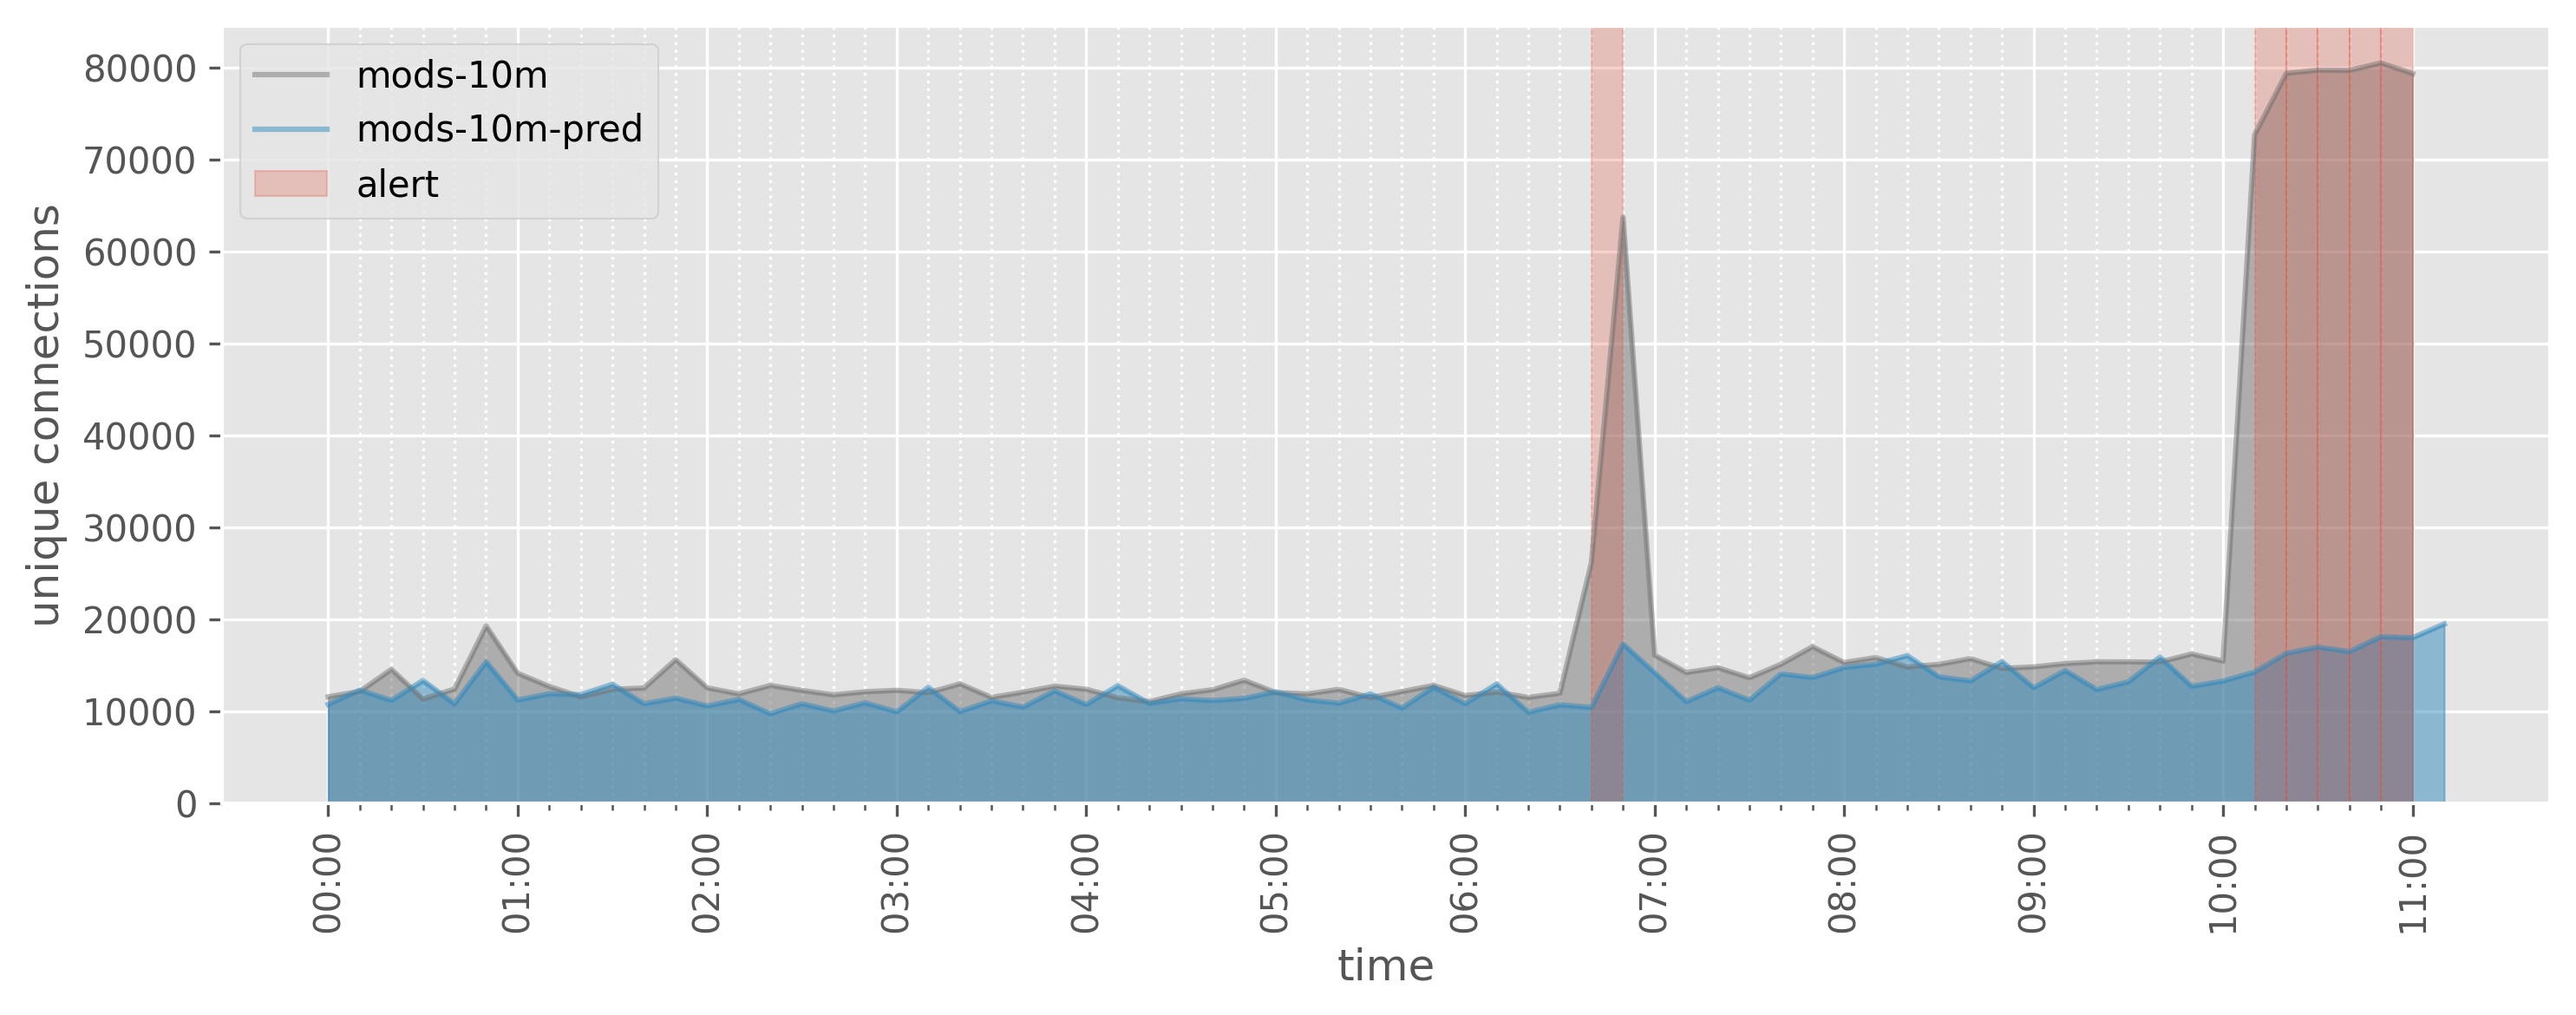

In [452]:
cm = 1/2.54
fig, ax = plt.subplots(figsize=(10,4), dpi=300)
groups = df.groupby(df.columns[0])[df.columns[1]]
groups.plot.area(
    ax=ax,
    stacked=False,
    legend=True,
    figure=fig,
    style={categories[0]: 'C3-', categories[1]: 'C1-'},
    xlabel='time',
    ylabel='unique connections'
)
# ax.axvspan(df.index[0], df.index[10], alpha=0.5, color='C0')

diffs = group.get_group(categories[0]) - group.get_group(categories[1])
print('diffs:\n\n', diffs.describe(), '\n')
threshold = diffs.describe()['mean']
last = None
for x in diffs[diffs > threshold].index:
    x = group.get_group(categories[0]).index.get_loc(x)
    if last and np.abs(x - last) == 1:
        ax.axvspan(last, x, alpha=0.25, color='C0')
    # ax.axvline(group.get_group('mods-10m').index.get_loc(x))
    last = x
ax.legend([categories[0], categories[1], 'alert'])

xmajor = np.arange(0, group.get_group(categories[0]).shape[0], 6)
xminor = np.arange(0, group.get_group(categories[0]).shape[0], 1)

ax.tick_params(axis='x', which='major', labelrotation=90)

ax.grid(which='minor', alpha=1, linestyle=':')
ax.grid(which='major', alpha=1, linestyle='-')

ax.set_xticks(xmajor)
ax.set_xticks(xminor, minor=True)

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : '%s' % str(group.get_group(categories[0]).index[x])))

plt.tight_layout()
plt.show(ax)
fig.savefig('%s.pdf' % file)